In [1]:
# Objective is to get factor exposure and idiosyncratic risk for a common stocks
import pandas_datareader
import matplotlib.pyplot as plt

In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = '1926-01-01'

In [4]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read() #monthly as daily factor returns are too noisy

In [5]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 2022-12   -6.41 -0.64  1.36  0.33
 
 [1158 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 2022  -21.60  -6.79  25.85  1.43
 
 [96 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [6]:
ff_df = ff[0]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

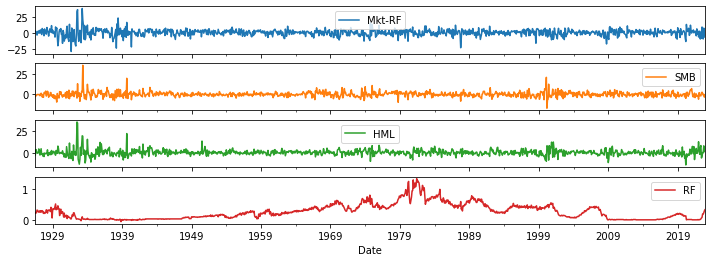

In [7]:
ff_df.plot(subplots=True, figsize=(12,4)) 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

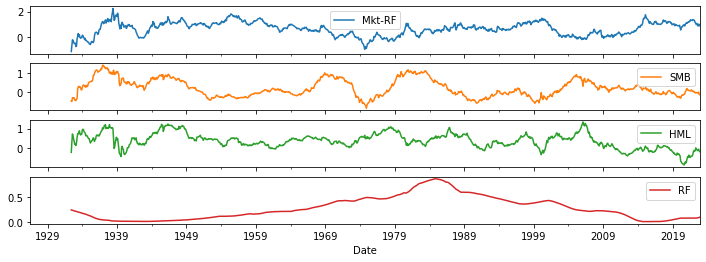

In [8]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4)) # 72 month rolling average window

In [9]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]

array([<AxesSubplot:xlabel='Date'>], dtype=object)

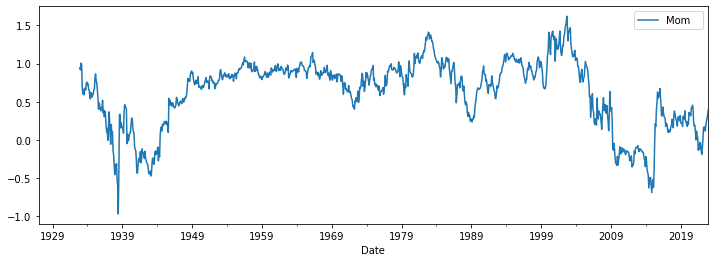

In [10]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4)) 

In [11]:
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19
2022-10,7.83,0.10,8.05,0.23


In [12]:
ff_mom_df # Momentum dataframe

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2022-08,2.10
2022-09,3.48
2022-10,3.89


In [13]:
# Dataframe with all four risk factors
import pandas as pd
ffac_merged_df = pd.merge(ff_df, ff_mom_df,on='Date', how = 'inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [14]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19,2.10
2022-09,-9.35,-0.82,0.03,0.19,3.48
2022-10,7.83,0.10,8.05,0.23,3.89


In [15]:
import yfinance as yf
yf.pdr_override()

In [16]:
# We get percentage change in equity close returns adjusted monthly
AMZN_data = pandas_datareader.data.get_data_yahoo('AMZN', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [17]:
AMZN_data

Date
1997-05-31 00:00:00-04:00         NaN
1997-06-30 00:00:00-04:00    0.027773
1997-07-31 00:00:00-04:00    0.554065
1997-08-31 00:00:00-04:00   -0.023916
1997-09-30 00:00:00-04:00    0.855235
                               ...   
2022-09-30 00:00:00-04:00   -0.108622
2022-10-31 00:00:00-04:00   -0.093451
2022-11-30 00:00:00-05:00   -0.057595
2022-12-31 00:00:00-05:00   -0.129894
2023-01-31 00:00:00-05:00    0.227738
Freq: M, Name: Adj Close, Length: 309, dtype: float64

In [18]:
AMZN_df = AMZN_data.to_frame() 
AMZN_df.index.dtype

datetime64[ns, America/New_York]

In [19]:
ffac_merged_df.index.dtype

period[M]

In [20]:
#AMZN_df['str_date'] = AMZN_df.index.astype(str)
AMZN_df['dt_date'] = pd.to_datetime(AMZN_df.index).strftime('%Y-%m')

In [21]:
AMZN_df.dt_date.dtype

dtype('O')

In [22]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [23]:
# Merging Amazon equity returns with fama french risk factors with inner join
AMZN_ffac_merge_df = pd.merge(AMZN_df, ffac_merged_df, how = 'inner', on = 'dt_date', sort = True, indicator = False, validate = 'one_to_one')
AMZN_ffac_merge_df


,Adj Close,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date
0,NaN,1997-05,6.74,5.19,-4.13,0.49,-5.17,1997-05
1,0.027773,1997-06,4.10,1.22,1.58,0.37,2.60,1997-06
2,0.554065,1997-07,7.33,-2.74,0.26,0.43,3.77,1997-07
3,-0.023916,1997-08,-4.15,7.28,1.18,0.41,-2.56,1997-08
4,0.855235,1997-09,5.35,2.53,0.37,0.44,1.47,1997-09
...,...,...,...,...,...,...,...,...
303,-0.060615,2022-08,-3.77,1.39,0.31,0.19,2.10,2022-08
304,-0.108622,2022-09,-9.35,-0.82,0.03,0.19,3.48,2022-09
305,-0.093451,2022-10,7.83,0.10,8.05,0.23,3.89,2022-10
306,-0.057595,2022-11,4.60,-3.40,1.39,0.29,-2.01,2022-11


In [24]:
# Removing multiple date columns, renaming columns, calculating risk factors and removing not available values
AMZN_ffac_merge_df.drop(columns=['dt_date','str_date'], inplace=True)
AMZN_ffac_merge_df.rename(columns={'Adj Close':'AMZN'}, inplace=True)
AMZN_ffac_merge_df.rename(columns={'Mom   ':'MOM'}, inplace=True)
AMZN_ffac_merge_df['AMZN_RF'] = AMZN_ffac_merge_df['AMZN']*100-AMZN_ffac_merge_df['RF']
AMZN_ffac_merge_df.dropna(axis=0, inplace=True)
AMZN_ffac_merge_df

,AMZN,Mkt-RF,SMB,HML,RF,MOM,AMZN_RF
1,0.027773,4.10,1.22,1.58,0.37,2.60,2.407328
2,0.554065,7.33,-2.74,0.26,0.43,3.77,54.976511
3,-0.023916,-4.15,7.28,1.18,0.41,-2.56,-2.801647
4,0.855235,5.35,2.53,0.37,0.44,1.47,85.083455
5,0.171671,-3.80,-0.74,2.27,0.42,-0.57,16.747057
...,...,...,...,...,...,...,...
303,-0.060615,-3.77,1.39,0.31,0.19,2.10,-6.251505
304,-0.108622,-9.35,-0.82,0.03,0.19,3.48,-11.052189
305,-0.093451,7.83,0.10,8.05,0.23,3.89,-9.575131
306,-0.057595,4.60,-3.40,1.39,0.29,-2.01,-6.049470


In [25]:
from statsmodels.api import OLS
results = OLS(AMZN_ffac_merge_df['AMZN_RF'], AMZN_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']], missing='drop').fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AMZN_RF   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              32.88
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                    8.91e-23
Time:                        14:25:25   Log-Likelihood:                         -1253.8
No. Observations:                 307   AIC:                                      2516.
Df Residuals:                     303   BIC:                                      2531.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.8177      0.192      9.483      0.000       1.440       2.195
SMB           -0.4675      0.267     -1.754      0.080      -0.992       0.057
HML           -1.2764      0.253     -5.051      0.000      -1.774      -0.779
MOM            0.1080      0.176      0.614      0.540      -0.238       0.454
==============================================================================
Omnibus:                      202.407   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3425.291
Skew:                           2.394   Prob(JB):                         0.00
Kurtosis:                      18.647   Cond. No.                         1.96
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.tools
AMZN_ffac_merge_df_c = statsmodels.tools.add_constant(AMZN_ffac_merge_df, prepend=True)
AMZN_ffac_merge_df_c

,const,AMZN,Mkt-RF,SMB,HML,RF,MOM,AMZN_RF
1,1.0,0.027773,4.10,1.22,1.58,0.37,2.60,2.407328
2,1.0,0.554065,7.33,-2.74,0.26,0.43,3.77,54.976511
3,1.0,-0.023916,-4.15,7.28,1.18,0.41,-2.56,-2.801647
4,1.0,0.855235,5.35,2.53,0.37,0.44,1.47,85.083455
5,1.0,0.171671,-3.80,-0.74,2.27,0.42,-0.57,16.747057
...,...,...,...,...,...,...,...,...
303,1.0,-0.060615,-3.77,1.39,0.31,0.19,2.10,-6.251505
304,1.0,-0.108622,-9.35,-0.82,0.03,0.19,3.48,-11.052189
305,1.0,-0.093451,7.83,0.10,8.05,0.23,3.89,-9.575131
306,1.0,-0.057595,4.60,-3.40,1.39,0.29,-2.01,-6.049470


In [28]:
# To estimate the regression on amazon returns on Jensen's alpha plus exposures to each of the risk factors -  the market factor, the size factor, the value factor and the momentum factor 
# at monthly frequency and we can actually see it's loadings as well as it's idiosyncratic i.e. unexplained portion of return variability
results = OLS(AMZN_ffac_merge_df_c['AMZN_RF'], AMZN_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']], missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AMZN_RF   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     31.87
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.70e-22
Time:                        14:25:25   Log-Likelihood:                -1249.0
No. Observations:                 307   AIC:                             2508.
Df Residuals:                     302   BIC:                             2527.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5689      0.831      3.093      0.002       0.934       4.203
Mkt-RF         1.7199      0.192      8.974      0.000       1.343       2.097
SMB           -0.4771      0.263     -1.815      0.071      -0.994       0.040
HML           -1.3437      0.250     -5.372      0.000      -1.836      -0.851
MOM            0.0325      0.175      0.185      0.853      -0.312       0.377
==============================================================================
Omnibus:                      207.307   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3606.894
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      19.050   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""